# 评价线性回归模型

In [1]:
#https://www.toutiao.com/i7033652290867167782

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [3]:
profit=pd.read_csv('50_Startups.csv',sep=",")
profit.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
profit = profit.rename(columns={'R&D Spend': 'RD_Spend', 'Administration': 'Administration', 
                       'Marketing Spend': 'Marketing_Spend', 'State': 'State', 'Profit': 'Profit'})
profit.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
fit=sm.formula.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=profit).fit()
print(fit.params)

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64


In [6]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        08:46:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353     

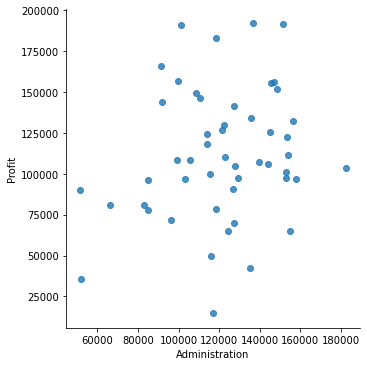

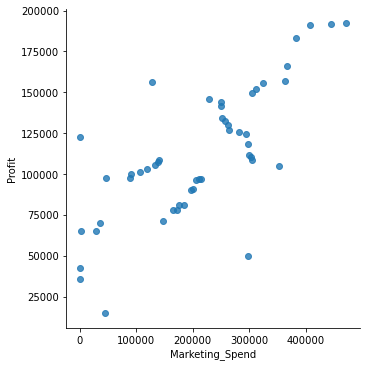

In [7]:
sns.lmplot(x='Administration',y='Profit',data=profit,
               legend_out=False,#将图例呈现在图框内
               fit_reg=False #不显示拟合曲线
               )
sns.lmplot(x='Marketing_Spend',y='Profit',data=profit,
               legend_out=False,#将图例呈现在图框内
               fit_reg=False #不显示拟合曲线
               )
plt.show()

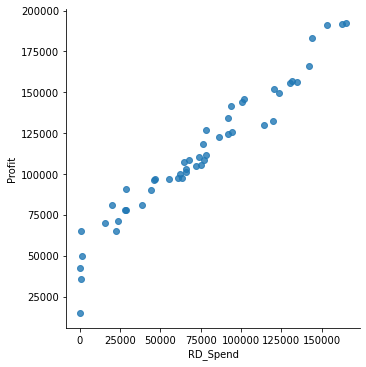

In [8]:
sns.lmplot(x='RD_Spend',y='Profit',data=profit,
               legend_out=False,#将图例呈现在图框内
               fit_reg=False #不显示拟合曲线
               )
plt.show()

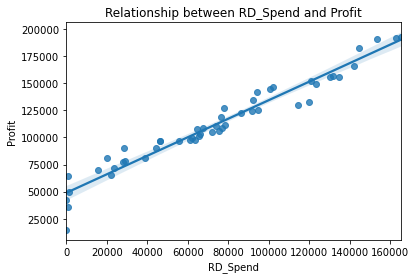

In [9]:
# Between prices and No. of rooms
sns.regplot(x="RD_Spend",y="Profit", data=profit, fit_reg=True)
plt.title("Relationship between RD_Spend and Profit")
plt.show()

In [10]:
#将Administration、Marketing_Spend变量从模型中剔除
fit2 = sm.formula.ols('Profit~RD_Spend',data=profit).fit()
print(fit2.params)
print(fit2.summary())

Intercept    49032.899141
RD_Spend         0.854291
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           3.50e-32
Time:                        08:46:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [11]:
#异常值检验
outliers=fit2.get_influence()

#高杠杆值点（帽子矩阵）
leverage=outliers.hat_matrix_diag
#diffits值
dffits=outliers.dffits[0]
#学生化残差
resid_stu=outliers.resid_studentized_external
#cook距离
cook=outliers.cooks_distance[0]

concat_result = pd . concat ( [ pd . Series ( leverage , name = 'leverage') , pd . Series ( dffits , name = 'diffits') ,
    pd . Series ( resid_stu , name = 'resid_stu') , pd . Series ( cook , name = 'cook' ) ] , axis = 1 )

raw_outliers = pd.concat ( [ profit , concat_result ] , axis = 1 )
raw_outliers.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,leverage,diffits,resid_stu,cook
0,165349.20,136897.80,471784.10,New York,192261.83,0.101318,0.073456,0.218771,0.002753
1,162597.70,151377.59,443898.53,California,191792.06,0.096508,0.139502,0.426837,0.009899
2,153441.51,101145.55,407934.54,Florida,191050.39,0.081556,0.362855,1.217678,0.065177
3,144372.41,118671.85,383199.62,New York,182901.99,0.068347,0.315040,1.163141,0.049263
4,142107.34,91391.77,366168.42,Florida,166187.94,0.065297,-0.122261,-0.462571,0.007598


In [12]:
outliers_ratio=sum(np.where(np.abs(raw_outliers.resid_stu)>2,1,0))/raw_outliers.shape[0]
print(outliers_ratio)

0.04


In [13]:
#通过筛选的方法，将异常点排除
none_outliers=raw_outliers.loc[np.abs(raw_outliers.resid_stu)<=2,]

#应用无异常值的数据集重新建模
fit3=sm.formula.ols('Profit~RD_Spend',data=none_outliers).fit() #none_outliers

#返回模型的概览信息
print(fit3.params)
print(fit3.summary())

Intercept    51454.448622
RD_Spend         0.836629
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.28e-34
Time:                        08:46:47   Log-Likelihood:                -495.77
No. Observations:                  48   AIC:                             995.5
Df Residuals:                      46   BIC:                             999.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [14]:
pred=fit3.predict(profit[['RD_Spend']])

#对于实际值与预测值的比较
df=pd.concat([pd.Series(profit.Profit/100,name='real'),pd.Series(pred/100,name='prediction')],axis=1)
df['误差绝对值']=np.abs((df['real']-df['prediction'])/100)

df.head(10)

,real,prediction,误差绝对值
0,1922.6183,1897.903980,0.247143
1,1917.9206,1874.884131,0.430365
2,1910.5039,1798.280783,1.122231
3,1829.0199,1722.406055,1.066138
4,1661.8794,1703.455820,0.415764
5,1569.9112,1617.864984,0.479538
6,1561.2251,1640.776573,0.795515
7,1557.5260,1604.656535,0.471305
8,1522.1177,1523.038265,0.009206
9,1497.5996,1546.399960,0.488004


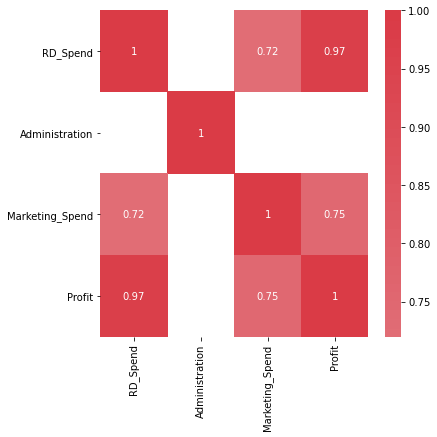

In [15]:
ContinuousCols = ['RD_Spend','Administration','Marketing_Spend','Profit']

df2 = profit[ContinuousCols]
cor_matrix = df2.corr().round(2)

# Plotting heatmap 
fig = plt.figure(figsize=(6,6));
kot = cor_matrix[abs(cor_matrix)>=.45]
sns.heatmap(kot, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()
